In [1]:
import numpy as np

In [2]:
X = np.array([[1, 1], [1, 2], [-2.5, 1]])
W_q = np.array([[0, 0], [0, 1]])

Q = np.dot(X, W_q)
Q

array([[0., 1.],
       [0., 2.],
       [0., 1.]])

In [3]:
W_k = np.array([[1, 1], [0, 0]])

K = np.dot(X, W_k)
K

array([[ 1. ,  1. ],
       [ 1. ,  1. ],
       [-2.5, -2.5]])

In [4]:
W_v = np.array([[1, 0], [0, 1]])

V = np.dot(X, W_v)
V

array([[ 1. ,  1. ],
       [ 1. ,  2. ],
       [-2.5,  1. ]])

In [5]:
X = np.array([[1, 1], [1, 2], [-2.5, 1]])

W_q1 = np.array([[0], [0]])
W_q2 = np.array([[1], [1]])

Q_1 = np.dot(X, W_q1)
Q_2 = np.dot(X, W_q2)
Q_1, Q_2

(array([[0.],
        [0.],
        [0.]]),
 array([[ 2. ],
        [ 3. ],
        [-1.5]]))

In [6]:
W_k1 = np.array([[1], [0]])
W_k2 = np.array([[0], [1]])

K_1 = np.dot(X, W_k1)
K_2 = np.dot(X, W_k2)

K_1, K_2

(array([[ 1. ],
        [ 1. ],
        [-2.5]]),
 array([[1.],
        [2.],
        [1.]]))

In [7]:
W_v1 = np.array([[1], [1]])
W_v2 = np.array([[1], [1]])

V_1 = np.dot(X, W_v1)
V_2 = np.dot(X, W_v2)

V_1, V_2

(array([[ 2. ],
        [ 3. ],
        [-1.5]]),
 array([[ 2. ],
        [ 3. ],
        [-1.5]]))

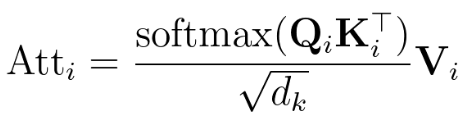

In [8]:
def softmax(x):
    return np.exp(x) / np.sum(np.exp(x), axis=0)


heads = 2
d_k = 1

Att_1 = (softmax(Q_1 @ K_1.T) / np.sqrt(d_k)) @ V_1
Att_1 = np.array([[1.2], [1.2], [1.2]])
Att_1

array([[1.2],
       [1.2],
       [1.2]])

In [9]:
Att_2 = (softmax(Q_2 @ K_2.T) / np.sqrt(d_k)) @ V_2

Att_2 = np.array([[2.425], [2.755], [0.525]])

Att_2

array([[2.425],
       [2.755],
       [0.525]])

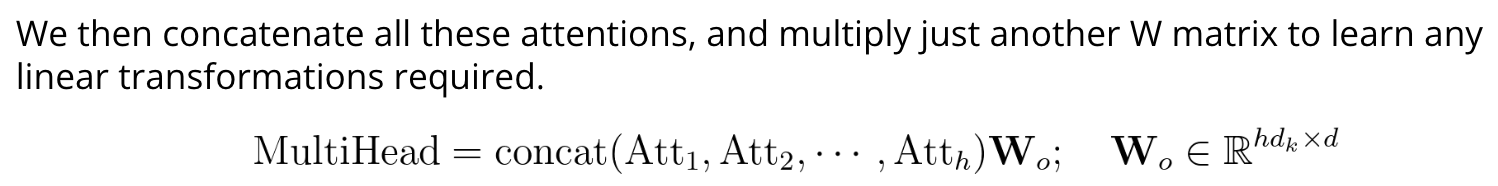

In [10]:
multi_head = np.concatenate([Att_1, Att_2], axis=1)
multi_head

array([[1.2  , 2.425],
       [1.2  , 2.755],
       [1.2  , 0.525]])

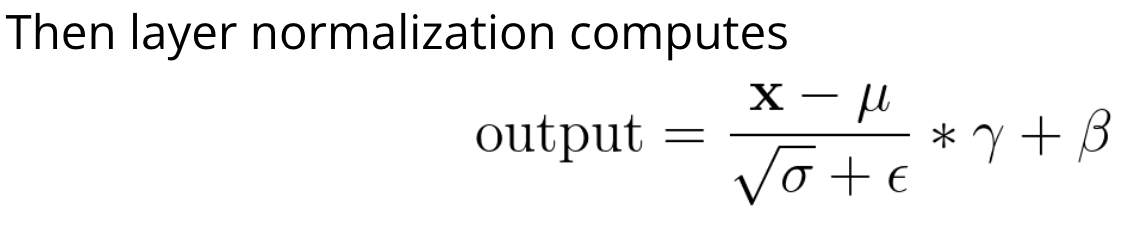

In [11]:
def layernorm(x):
    return (x - np.mean(x)) / np.std(x)


added = X + multi_head
added

array([[ 2.2  ,  3.425],
       [ 2.2  ,  4.755],
       [-1.3  ,  1.525]])

In [12]:
np.mean(added[0, :]), np.mean(added[1, :]), np.mean(added[2, :])

(2.8125, 3.4775, 0.11249999999999993)

In [13]:
np.std(added[0, :]), np.std(added[1, :]), np.std(added[2, :])

(0.6124999999999998, 1.2774999999999999, 1.4125)

In [14]:
layernorm(added)

array([[ 0.0354364 ,  0.69482251],
       [ 0.0354364 ,  1.41072743],
       [-1.84852392, -0.32789881]])

# Example 2

In [15]:
# Chaky loves soccer

tokens = 3

X_1 = np.array([[0], [1]])
X_2 = np.array([[1], [1]])
X_3 = np.array([[-1], [0]])

P_1 = np.array([[1], [-1]])
P_2 = np.array([[-1], [-2]])
P_3 = np.array([[2], [1]])

W_q1 = np.array([[0], [-1]])
W_q2 = np.array([[1], [1]])

W_k1 = np.array([[1], [-1]])
W_k2 = np.array([[-1], [0]])

W_v1 = np.array([[0], [1]])
W_v2 = np.array([[-1], [-1]])

d_k = 1
heads = 2

W_0 = np.array([[1, 1], [0, 0]])

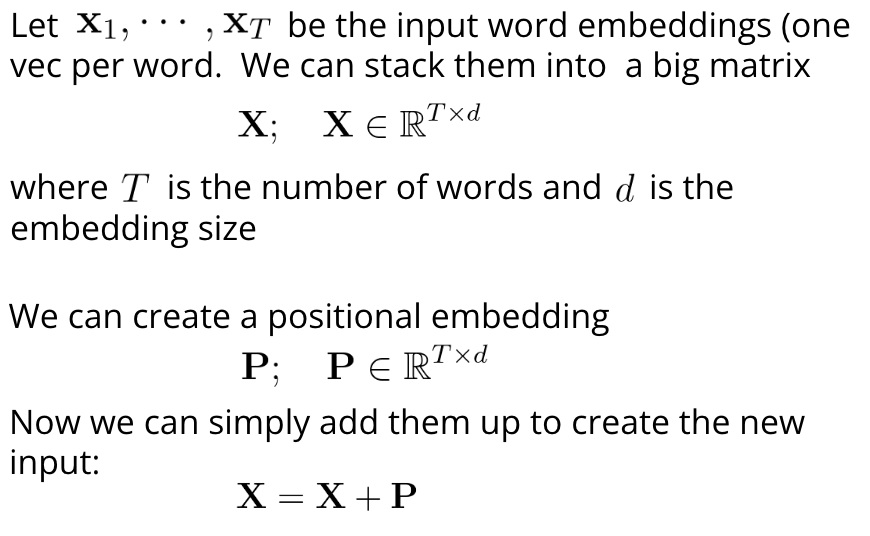

In [16]:
X = np.concatenate([X_1, X_2, X_3], axis=1) + np.concatenate([P_1, P_2, P_3], axis=1)
X = X.T
X
# Shape (3, 2)

array([[ 1,  0],
       [ 0, -1],
       [ 1,  1]])

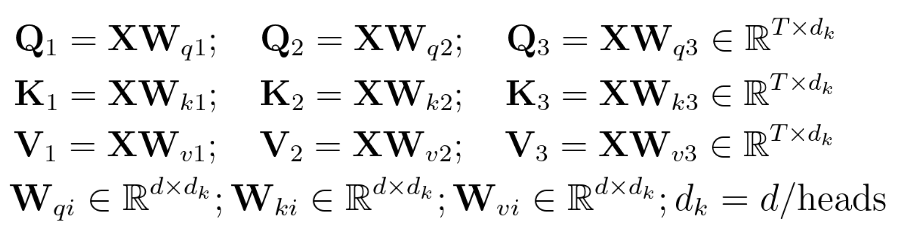

In [17]:
Q_1 = np.dot(X, W_q1)
Q_2 = np.dot(X, W_q2)

K_1 = np.dot(X, W_k1)
K_2 = np.dot(X, W_k2)

V_1 = np.dot(X, W_v1)
V_2 = np.dot(X, W_v2)

In [18]:
Q_1, Q_2

(array([[ 0],
        [ 1],
        [-1]]),
 array([[ 1],
        [-1],
        [ 2]]))

In [19]:
K_1, K_2

(array([[1],
        [1],
        [0]]),
 array([[-1],
        [ 0],
        [-1]]))

In [20]:
V_1, V_2

(array([[ 0],
        [-1],
        [ 1]]),
 array([[-1],
        [ 1],
        [-2]]))

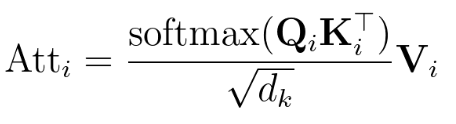

In [21]:
Att_1 = (softmax(Q_1 @ K_1.T)) / np.sqrt(d_k) @ V_1
Att_1

array([[ 0.08860486],
       [-0.33190762],
       [ 0.24330276]])

In [22]:
Att_2 = (softmax(Q_2 @ K_2.T)) / np.sqrt(d_k) @ V_2
Att_2

array([[-0.00925226],
       [-2.19805087],
       [ 0.20730313]])

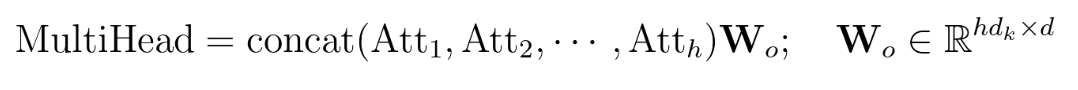

In [23]:
multi_head = np.concatenate([Att_1, Att_2], axis=1) @ W_0
multi_head

array([[ 0.08860486,  0.08860486],
       [-0.33190762, -0.33190762],
       [ 0.24330276,  0.24330276]])

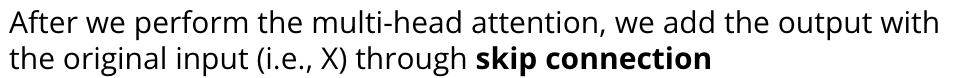

In [24]:
skip = X + multi_head
skip

array([[ 1.08860486,  0.08860486],
       [-0.33190762, -1.33190762],
       [ 1.24330276,  1.24330276]])

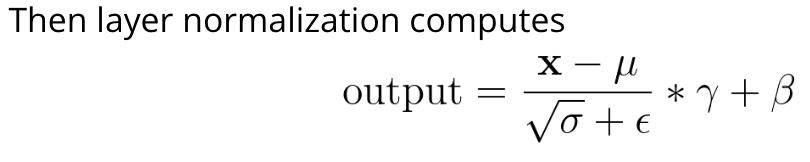

In [25]:
layernorm = (skip - np.mean(skip)) / np.std(skip)
layernorm
# Shape: (3, 2)

array([[ 0.7887128 , -0.25556435],
       [-0.69469593, -1.73897308],
       [ 0.95026028,  0.95026028]])